# Task 2 – Technical Indicators (MA, RSI, MACD)

This notebook:
- Loads stock price data
- Computes technical indicators
- Visualizes the indicators alongside price


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

try:
    import talib
    TA_LIB_AVAILABLE = True
except ImportError:
    TA_LIB_AVAILABLE = False
    print("TA-Lib not installed – using pandas-based fallbacks.")


In [4]:
import pandas as pd

PRICE_PATH = "../../yfinance_data/Data/AAPL.csv"

df_price = pd.read_csv(PRICE_PATH)
df_price["Date"] = pd.to_datetime(df_price["Date"])
df_price = df_price.sort_values("Date").set_index("Date")

df_price.head()


,Close,High,Low,Open,Volume
Date,,,,,
2009-01-02,2.721686,2.730385,2.554037,2.575630,746015200
2009-01-05,2.836553,2.884539,2.780469,2.794266,1181608400
2009-01-06,2.789767,2.914229,2.770872,2.877641,1289310400
2009-01-07,2.729484,2.774170,2.706990,2.753477,753048800
2009-01-08,2.780169,2.793666,2.700393,2.712090,673500800


In [5]:
df_price["SMA_20"] = df_price["Close"].rolling(window=20).mean()
df_price["SMA_50"] = df_price["Close"].rolling(window=50).mean()
df_price[["Close", "SMA_20", "SMA_50"]].tail()


,Close,SMA_20,SMA_50
Date,,,
2023-12-22,191.788757,191.856618,183.572859
2023-12-26,191.243912,192.018094,183.858864
2023-12-27,191.342972,192.154308,184.149424
2023-12-28,191.768951,192.362839,184.479567
2023-12-29,190.728775,192.490633,184.814828


In [6]:
def rsi_pandas(series, period: int = 14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

if TA_LIB_AVAILABLE:
    df_price["RSI_14"] = talib.RSI(df_price["Close"], timeperiod=14)
else:
    df_price["RSI_14"] = rsi_pandas(df_price["Close"], period=14)

df_price["RSI_14"].tail()


Date
2023-12-22    54.672784
2023-12-26    53.090049
2023-12-27    53.354446
2023-12-28    54.540999
2023-12-29    51.121347
Name: RSI_14, dtype: float64

In [7]:
def macd_pandas(series, fast=12, slow=26, signal=9):
    ema_fast = series.ewm(span=fast, adjust=False).mean()
    ema_slow = series.ewm(span=slow, adjust=False).mean()
    macd_line = ema_fast - ema_slow
    signal_line = macd_line.ewm(span=signal, adjust=False).mean()
    hist = macd_line - signal_line
    return macd_line, signal_line, hist

if TA_LIB_AVAILABLE:
    macd, macd_signal, macd_hist = talib.MACD(df_price["Close"])
else:
    macd, macd_signal, macd_hist = macd_pandas(df_price["Close"])

df_price["MACD"] = macd
df_price["MACD_signal"] = macd_signal
df_price["MACD_hist"] = macd_hist

df_price[["MACD", "MACD_signal", "MACD_hist"]].tail()


,MACD,MACD_signal,MACD_hist
Date,,,
2023-12-22,2.633141,3.235256,-0.602115
2023-12-26,2.304751,3.049155,-0.744404
2023-12-27,2.029104,2.845145,-0.816041
2023-12-28,1.823998,2.640915,-0.816918
2023-12-29,1.559539,2.424640,-0.865101


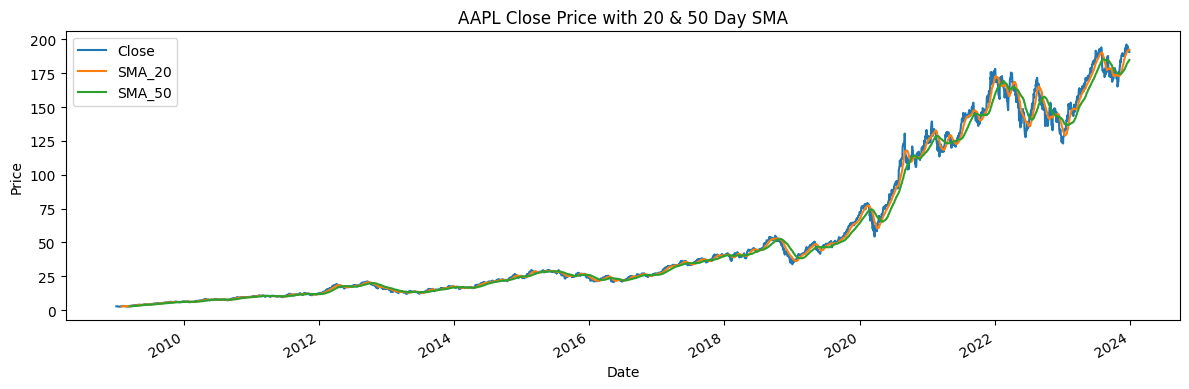

In [8]:
df_price[["Close", "SMA_20", "SMA_50"]].plot(figsize=(12,4))
plt.title("AAPL Close Price with 20 & 50 Day SMA")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


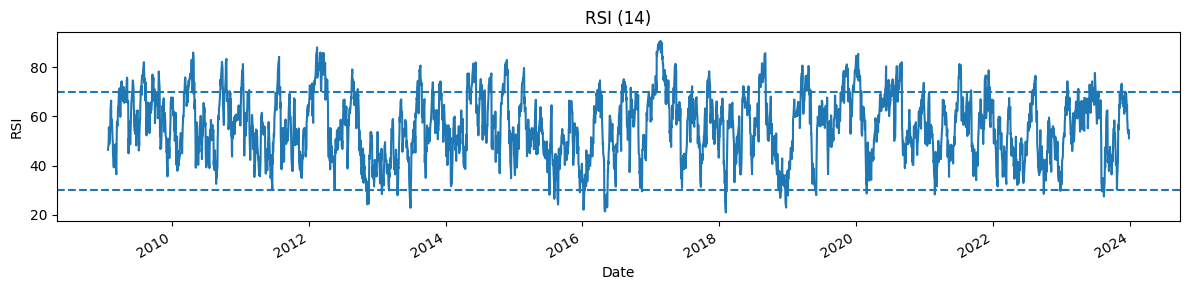

In [9]:
df_price["RSI_14"].plot(figsize=(12,3))
plt.axhline(70, linestyle="--")
plt.axhline(30, linestyle="--")
plt.title("RSI (14)")
plt.ylabel("RSI")
plt.tight_layout()
plt.show()


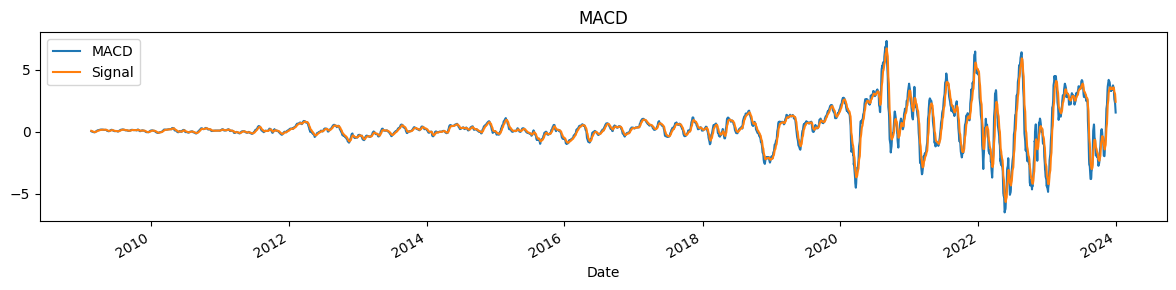

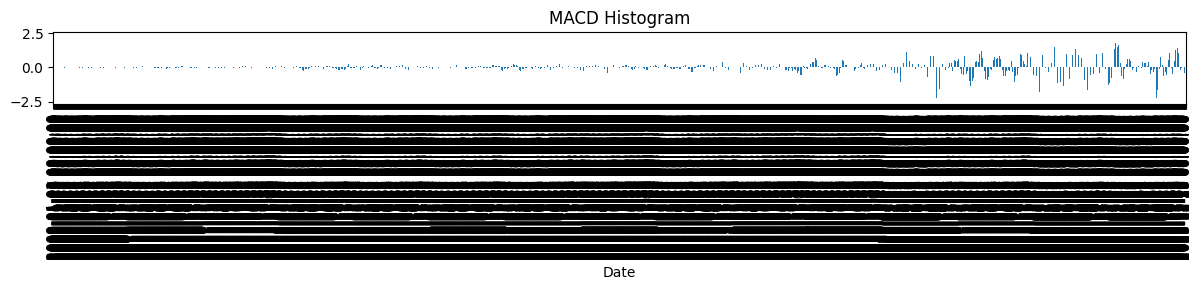

In [10]:
df_price["MACD"].plot(figsize=(12,3), label="MACD")
df_price["MACD_signal"].plot(label="Signal")
plt.title("MACD")
plt.legend()
plt.tight_layout()
plt.show()

df_price["MACD_hist"].plot(kind="bar", figsize=(12,3))
plt.title("MACD Histogram")
plt.tight_layout()
plt.show()
